In [1]:
# %load ../helpers/header.py
SUB_DIR = "Nets"
# load ENV path to project from .profile 
import os, sys
PROJECT_ROOT_DIR=os.environ.get('ML_PATH')
sys.path.append(os.path.join(PROJECT_ROOT_DIR, "helpers")) # add helper modules to path

# MPL 
import MPL_header #load common MPL imports (from helpers)
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib widget 

# NP, constant seed, PD 
import numpy as np
np.random.seed(12345)
import pandas as pd

# Where to save the figures
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "fig", SUB_DIR)
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "fig")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import tensorflow as tf
from tensorflow import keras # shortuct for tensorflow.keras (TF's own keras module!)
print("for production better to be explicit, e.g. from tensorflow.keras.layers import Dense")

# Keras: classification

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
type(X_train_full)

numpy.ndarray

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

## scale featues and create validation set

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]] # '4' 

'Coat'

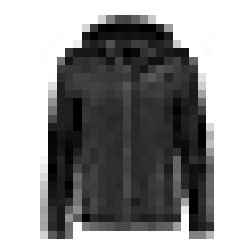

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

## Creating the model using the Sequential API:  if you know the input shape when creating the model, it is best to specify it (to allow full initialisation without passing data)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

### Equivalent implimentation
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

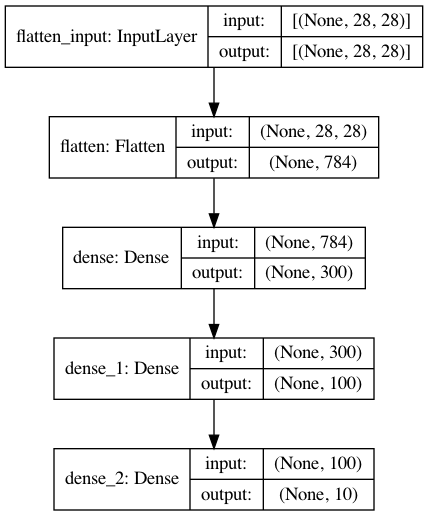

In [12]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True) # TODO explore options / alternatives

In [13]:
model.summary() # None means the batch size can be anything

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
# model.get_layer('dense_3') is hidden1

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04112107, -0.00281525,  0.02638022, ..., -0.04034528,
        -0.03517828, -0.03543289],
       [ 0.02873962, -0.03813784, -0.04136604, ..., -0.04366256,
        -0.02378226, -0.04580366],
       [-0.03592632,  0.02016095, -0.0530415 , ...,  0.00082644,
        -0.0113503 ,  0.00136113],
       ...,
       [ 0.01495071, -0.02628713,  0.07112731, ...,  0.00054303,
         0.06788664, -0.04640817],
       [-0.04020575,  0.072917  , -0.01802624, ..., -0.07409426,
        -0.01685185,  0.05533841],
       [ 0.00474736, -0.05396588, -0.06832068, ...,  0.00346883,
         0.03916458, -0.03453274]], dtype=float32)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

### Compiling the model: After a model is created, you must call its compile() method to specify the loss func‐ tion and the optimizer to use

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", 
              metrics=["accuracy"])

### Fit/train and evaluate

In [21]:
# TODO explore more progress bar options
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [22]:
 # verbose=1 (bar), 2=each line, default, TODO explore all options: validation_steps (stopping)
#  history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_valid, y_valid), callbacks=[tqdm_callback])
 history = model.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9849 - accuracy: 0.6826 - val_loss: 0.5380 - val_accuracy: 0.8142
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5062 - accuracy: 0.8230 - val_loss: 0.4665 - val_accuracy: 0.8372
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4533 - accuracy: 0.8423 - val_loss: 0.4270 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 2s 962us/step - loss: 0.4267 - accuracy: 0.8522 - val_loss: 0.4131 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4026 - accuracy: 0.8579 - val_loss: 0.3871 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 2s 976us/step - loss: 0.3821 - accuracy: 0.8667 - val_loss: 0.3909 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3717 - accuracy: 0.8677 - val_loss: 0.3951 - val_accur

### If the training set was very skewed, with some classes being overrepresented and oth‐ ers underrepresented, it would be useful to set the class_weight argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes.

### If you need per-instance weights, set the sam ple_weight argument (if both class_weight and sample_weight are provided, Keras multiplies them). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former.

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.0)

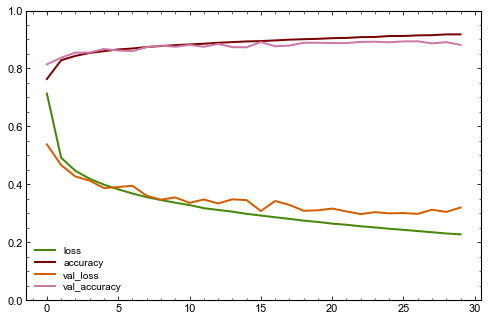

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.style.use('dark_background')
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

### the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

In [26]:
## we would normally keep training to converge, try other parmas, CV... you know the drill )
result = model.evaluate(X_test, y_test)
print("test loss, test acc:", result)

313/313 [==============================] - 0s 1ms/step - loss: 53.6547 - accuracy: 0.8630
test loss, test acc: [53.65472412109375, 0.8629999756813049]


## Predict

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(6)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = model.predict_classes(X_new) # class with highest probability
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Building a Regression MLP Using the Sequential API

In [29]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [32]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [36]:
print("!N.B. 1) Scaling features 2) Only numeric here")

!N.B. 1) Scaling features 2) Only numeric here


In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [40]:
X_train.shape[1:]

(8,)

In [49]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [63]:
model = Sequential([
    Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    Dense(1)
])

In [64]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [65]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 950us/step - loss: 1.3133 - val_loss: 0.5411
Epoch 2/20
363/363 [==============================] - 0s 708us/step - loss: 0.5227 - val_loss: 0.4982
Epoch 3/20
363/363 [==============================] - 0s 739us/step - loss: 0.5438 - val_loss: 0.4780
Epoch 4/20
363/363 [==============================] - 0s 722us/step - loss: 0.4694 - val_loss: 0.4643
Epoch 5/20
363/363 [==============================] - 0s 707us/step - loss: 0.4249 - val_loss: 0.4529
Epoch 6/20
363/363 [==============================] - 0s 713us/step - loss: 0.4248 - val_loss: 0.4454
Epoch 7/20
363/363 [==============================] - 0s 710us/step - loss: 0.4352 - val_loss: 0.4389
Epoch 8/20
363/363 [==============================] - 0s 725us/step - loss: 0.4087 - val_loss: 0.4472
Epoch 9/20
363/363 [==============================] - 0s 744us/step - loss: 0.4124 - val_loss: 0.4245
Epoch 10/20
363/363 [==============================] - 0s 731us/step - loss: 0.412

In [66]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 455us/step - loss: 0.3880


In [67]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[1.9796243],
       [1.6528496],
       [1.5215998]], dtype=float32)

# Functional API

### This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path) -- The short path can also be used to provide manually engineered features to the neural network.

In [74]:
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras import Model

In [78]:
X_train.shape[1:]

(8,)

In [76]:
input_ = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_, hidden2]) ## short path 
output_ = Dense(1)(concat)
model = Model(inputs=[input_], outputs=[output_])

## For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

In [79]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [81]:
 model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [82]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [83]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.9949 - val_loss: 0.9683
Epoch 2/20
363/363 [==============================] - 0s 845us/step - loss: 0.8777 - val_loss: 0.7600
Epoch 3/20
363/363 [==============================] - 0s 820us/step - loss: 0.7411 - val_loss: 0.6983
Epoch 4/20
363/363 [==============================] - 0s 826us/step - loss: 0.6358 - val_loss: 0.6551
Epoch 5/20
363/363 [==============================] - 0s 811us/step - loss: 0.6211 - val_loss: 0.6240
Epoch 6/20
363/363 [==============================] - 0s 812us/step - loss: 0.6081 - val_loss: 0.5997
Epoch 7/20
363/363 [==============================] - 0s 820us/step - loss: 0.5641 - val_loss: 0.5783
Epoch 8/20
363/363 [==============================] - 0s 816us/step - loss: 0.5627 - val_loss: 0.5611
Epoch 9/20
363/363 [==============================] - 0s 832us/step - loss: 0.5377 - val_loss: 0.5456
Epoch 10/20
363/363 [==============================] - 0s 867us/step - loss: 0.5299 

## Alternatively, you can pass a dictionary mapping the input names to the input values, like {"wide_input": X_train_A, "deep_input": X_train_B}.

In [84]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 483us/step - loss: 0.4925


In [85]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[2.2241676],
       [1.8109155],
       [1.6758199]], dtype=float32)

## Mutliple outputs allow to have Reg + Class in one, multitask classification, etc. 

In [88]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

## Each output will need its own loss function, and as we care about main loss more - give it more weight

In [89]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [90]:
 history = model.fit(
         [X_train_A, X_train_B], [y_train, y_train], epochs=20,
         validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
         )

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7223 - main_output_loss: 1.5918 - aux_output_loss: 2.8966 - val_loss: 0.9473 - val_main_output_loss: 0.8819 - val_aux_output_loss: 1.5364
Epoch 2/20
363/363 [==============================] - 0s 955us/step - loss: 1.0072 - main_output_loss: 0.9658 - aux_output_loss: 1.3800 - val_loss: 0.6388 - val_main_output_loss: 0.5858 - val_aux_output_loss: 1.1154
Epoch 3/20
363/363 [==============================] - 0s 967us/step - loss: 0.6608 - main_output_loss: 0.6060 - aux_output_loss: 1.1542 - val_loss: 0.5704 - val_main_output_loss: 0.5224 - val_aux_output_loss: 1.0015
Epoch 4/20
363/363 [==============================] - 0s 934us/step - loss: 0.5648 - main_output_loss: 0.5214 - aux_output_loss: 0.9559 - val_loss: 0.5355 - val_main_output_loss: 0.4973 - val_aux_output_loss: 0.8795
Epoch 5/20
363/363 [==============================] - 0s 955us/step - loss: 0.5635 - main_output_loss: 0.5288 - aux_output_loss: 0.8756 - 

In [92]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 556us/step - loss: 0.3995 - main_output_loss: 0.3836 - aux_output_loss: 0.5426


(0.39954790472984314, 0.38364869356155396, 0.542640209197998)

In [94]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux 

(array([[2.2124662],
        [1.7477734],
        [1.3836877]], dtype=float32),
 array([[2.5694413],
        [1.743371 ],
        [1.2100763]], dtype=float32))

# Subclassing API to Build Dynamic Models

## This example looks very much like the Functional API, except we do not need to cre‐ ate the inputs; we just use the input argument to the call() metho

In [97]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name) 
        self.hidden1 = keras.layers.Dense(units, activation=activation) 
        self.hidden2 = keras.layers.Dense(units, activation=activation) 
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2]) 
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [106]:
model = WideAndDeepModel()
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

# Saving and Restoring a Model

In [110]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [111]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 978us/step - loss: 3.3728 - val_loss: 1.0095
Epoch 2/10
363/363 [==============================] - 0s 767us/step - loss: 0.8913 - val_loss: 0.7553
Epoch 3/10
363/363 [==============================] - 0s 773us/step - loss: 0.7073 - val_loss: 0.6988
Epoch 4/10
363/363 [==============================] - 0s 867us/step - loss: 0.6615 - val_loss: 0.6648
Epoch 5/10
363/363 [==============================] - 0s 873us/step - loss: 0.6430 - val_loss: 0.6386
Epoch 6/10
363/363 [==============================] - 0s 824us/step - loss: 0.6170 - val_loss: 0.6162
Epoch 7/10
363/363 [==============================] - 0s 755us/step - loss: 0.5690 - val_loss: 0.5986
Epoch 8/10
363/363 [==============================] - 0s 792us/step - loss: 0.5630 - val_loss: 0.5823
Epoch 9/10
363/363 [==============================] - 0s 860us/step - loss: 0.5277 - val_loss: 0.5691
Epoch 10/10
162/162 [==============================] - 0s 468us/step - loss: 0.562

In [112]:
model.save("my_keras_model.h5") ## Sequential or Functional only -- You can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore everything else yourself.

In [113]:
model = keras.models.load_model("my_keras_model.h5")

## Using Callbacks (save checkpoints during training)

In [114]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 574us/step - loss: 0.5252
Epoch 2/10
363/363 [==============================] - 0s 589us/step - loss: 0.5161
Epoch 3/10
363/363 [==============================] - 0s 540us/step - loss: 0.5078
Epoch 4/10
363/363 [==============================] - 0s 530us/step - loss: 0.5004
Epoch 5/10
363/363 [==============================] - 0s 579us/step - loss: 0.4938
Epoch 6/10
363/363 [==============================] - 0s 584us/step - loss: 0.4875
Epoch 7/10
363/363 [==============================] - 0s 588us/step - loss: 0.4825
Epoch 8/10
363/363 [==============================] - 0s 627us/step - loss: 0.4776
Epoch 9/10
363/363 [==============================] - 0s 575us/step - loss: 0.4732
Epoch 10/10
363/363 [==============================] - 0s 516us/step - loss: 0.4689


## Moreover, if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint.

In [115]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Epoch 1/10
363/363 [==============================] - 0s 967us/step - loss: 0.4655 - val_loss: 0.4895
Epoch 2/10
363/363 [==============================] - 0s 778us/step - loss: 0.4621 - val_loss: 0.4869
Epoch 3/10
363/363 [==============================] - 0s 747us/step - loss: 0.4589 - val_loss: 0.4832
Epoch 4/10
363/363 [==============================] - 0s 753us/step - loss: 0.4562 - val_loss: 0.4812
Epoch 5/10
363/363 [==============================] - 0s 765us/step - loss: 0.4535 - val_loss: 0.4785
Epoch 6/10
363/363 [==============================] - 0s 803us/step - loss: 0.4508 - val_loss: 0.4764
Epoch 7/10
363/363 [==============================] - 0s 794us/step - loss: 0.4484 - val_loss: 0.4731
Epoch 8/10
363/363 [==============================] - 0s 790us/step - loss: 0.4460 - val_loss: 0.4712
Epoch 9/10
363/363 [==============================] - 0s 769us/step - loss: 0.4439 - val_loss: 0.4697
Epoch 10/10
363/363 [==============================] - 0s 781us/step - loss: 0.441

In [117]:
## + Early stopping 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
363/363 [==============================] - 0s 973us/step - loss: 0.3435 - val_loss: 0.3731
Epoch 2/10
363/363 [==============================] - 0s 805us/step - loss: 0.3429 - val_loss: 0.3733
Epoch 3/10
363/363 [==============================] - 0s 813us/step - loss: 0.3424 - val_loss: 0.3733
Epoch 4/10
363/363 [==============================] - 0s 754us/step - loss: 0.3416 - val_loss: 0.3723
Epoch 5/10
363/363 [==============================] - 0s 745us/step - loss: 0.3411 - val_loss: 0.3726
Epoch 6/10
363/363 [==============================] - 0s 743us/step - loss: 0.3406 - val_loss: 0.3704
Epoch 7/10
363/363 [==============================] - 0s 769us/step - loss: 0.3400 - val_loss: 0.3703
Epoch 8/10
363/363 [==============================] - 0s 818us/step - loss: 0.3393 - val_loss: 0.3708
Epoch 9/10
363/363 [==============================] - 0s 779us/step - loss: 0.3391 - val_loss: 0.3703
Epoch 10/10
363/363 [==============================] - 0s 737us/step - loss: 0.338

In [118]:
## define your own callbacks:: on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end()
class PrintValTrainRatioCallback(keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# TensorBoard

In [119]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [120]:
def get_run_logdir(): 
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

In [121]:
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_03_01-21_53_04'

### `tensorboard --logdir=. --port=6006`

## TB as part of the callback :) 

In [126]:
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
history = model.fit(X_train, y_train, epochs=10,
                        validation_data=(X_valid, y_valid),
                        callbacks=[tensorboard_cb])

Epoch 1/10
363/363 [==============================] - 0s 838us/step - loss: 0.3166 - val_loss: 0.3473
Epoch 2/10
363/363 [==============================] - 0s 773us/step - loss: 0.3160 - val_loss: 0.3470
Epoch 3/10
363/363 [==============================] - 0s 916us/step - loss: 0.3160 - val_loss: 0.3473
Epoch 4/10
363/363 [==============================] - 0s 840us/step - loss: 0.3153 - val_loss: 0.3465
Epoch 5/10
363/363 [==============================] - 0s 878us/step - loss: 0.3150 - val_loss: 0.3470
Epoch 6/10
363/363 [==============================] - 0s 834us/step - loss: 0.3146 - val_loss: 0.3454
Epoch 7/10
363/363 [==============================] - 0s 810us/step - loss: 0.3143 - val_loss: 0.3456
Epoch 8/10
363/363 [==============================] - 0s 778us/step - loss: 0.3142 - val_loss: 0.3448
Epoch 9/10
363/363 [==============================] - 0s 786us/step - loss: 0.3138 - val_loss: 0.3449
Epoch 10/10
363/363 [==============================] - 0s 891us/step - loss: 0.313

In [128]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir) 
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)] 
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step) 
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1]) 
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters

In [133]:
## Custom NN function (hyperpars) -> keras sklearn wrapper -> CV 

In [130]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]): 
    model = keras.models.Sequential() 
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [131]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

## : we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method

In [136]:
keras_reg.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/10
363/363 [==============================] - 1s 984us/step - loss: 2.4021 - val_loss: 0.7372
Epoch 2/10
363/363 [==============================] - 0s 752us/step - loss: 0.7033 - val_loss: 0.6305
Epoch 3/10
363/363 [==============================] - 0s 753us/step - loss: 0.5918 - val_loss: 0.5776
Epoch 4/10
363/363 [==============================] - 0s 705us/step - loss: 0.5529 - val_loss: 0.5452
Epoch 5/10
363/363 [==============================] - 0s 725us/step - loss: 0.5216 - val_loss: 0.5264
Epoch 6/10
363/363 [==============================] - 0s 760us/step - loss: 0.5073 - val_loss: 0.5087
Epoch 7/10
363/363 [==============================] - 0s 729us/step - loss: 0.4799 - val_loss: 0.4992
Epoch 8/10
363/363 [==============================] - 0s 735us/step - loss: 0.4975 - val_loss: 0.4954
Epoch 9/10
363/363 [==============================] - 0s 743us/step - loss: 0.4816 - val_loss: 0.4876
Epoch 10/10
162/162 [==============================] - 0s 449us/step - loss: 0.484

## !! note that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses (i.e., higher should be better).

In [141]:
runCV=False
if(runCV):
    from scipy.stats import reciprocal
    from sklearn.model_selection import RandomizedSearchCV
    param_distribs = {
            "n_hidden": [0, 1, 2, 3],
            "n_neurons": np.arange(1, 100),
            "learning_rate": reciprocal(3e-4, 3e-2),
    }

    rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
    rnd_search_cv.fit(X_train, y_train, epochs=5,
                        validation_data=(X_valid, y_valid),
                        callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [139]:
rnd_search_cv.best_params_

{'learning_rate': 0.00719272383693792, 'n_hidden': 3, 'n_neurons': 70}

In [140]:
rnd_search_cv.best_score_

-0.4208002785841624

In [143]:
# model = rnd_search_cv.best_estimator_.model

## Here are some Python libraries you can use to optimize hyperparameters:

`Hyperopt`,  `Hyperas, kopt, or Talos`, `Keras Tuner`, `skopt`, `Spearmint`, `Hyperband`, `Sklearn-Deap`

## Number of Hidden Layers

"An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons".  But for complex problems, deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data.

"Real-world data is often structured in such a hierarchical way, and deep neural networks automatically take advantage of this fact: lower hidden layers model low-level structures (e.g., line segments of vari‐ ous shapes and orientations), intermediate hidden layers combine these low-level structures to model intermediate-level structures (e.g., squares, circles), and the high‐ est hidden layers and the output layer combine these intermediate structures to model high-level structures (e.g., faces)."

"For example, if you have already trained a model to recognize faces in pictures and you now want to train a new neural network to recognize hairstyles, you can kickstart the training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the values of the weights and biases of the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called transfer learning."

# Number of Neurons per Hidden Layer

For example, the MNIST task requires 28 × 28 = 784 input neurons and 10 output neurons. As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features. 

"In general you will get more bang for your buck by increasing the number of layers instead of the number of neurons per layer.
"

# Learning Rate, Batch Size, and Other Hyperparameters

Learning rate, Optimizer, Batch size, Activation function, Number of iterations (early stopping)